## Análisis de Datos de Temperatura

- Fecha: 2024-08-06
- Coder: César Zapata, Stiven Viscaino
- Objetivo: realizar la isnpección sobre los datos recolectados a través del API de openweather y usando la configuración de Linux para el registro de los mismos

In [1]:
!python -m pip install pandas

   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.6 MB 4.8 MB/s eta 0:00:03
   ------------ --------------------------- 3.7/11.6 MB 8.4 MB/s eta 0:00:01
   --------------------- ------------------ 6.3/11.6 MB 9.9 MB/s eta 0:00:01
   ---------------------------------- ----- 10.0/11.6 MB 11.5 MB/s eta 0:00:01
   ---------------------------------------- 11.6/11.6 MB 11.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/16.6 MB ? eta -:--:--
   ---------- ----------------------------- 4.5/16.6 MB 20.7 MB/s eta 0:00:01
   -------------------- ------------------- 8.7/16.6 MB 20.7 MB/s eta 0:00:01
   ----------------------------- ---------- 12.3/16.6 MB 19.3 MB/s eta 0:00:01
   ---------------------------------------  16.3/16.6 MB 19.7 MB/s eta 0:00:01
   ---------------------------------------- 16.6/16.6 MB 17.7 MB/s eta 0:00:00


In [2]:
import os
import pandas as pd

# Ruta directa en Windows
ruta_directorio = r'C:\Users\pc\PGW'
os.chdir(ruta_directorio)

# Listar archivos en el directorio
archivos = os.listdir(os.getcwd())
print("Archivos en el directorio actual:", archivos)

# Leer un archivo CSV si está en el directorio
archivo_csv = 'clima-latacunga-hoy.csv'
if archivo_csv in archivos:
    df = pd.read_csv(archivo_csv)
    print(df.head())
else:
    print(f"El archivo {archivo_csv} no se encuentra en el directorio.")


Archivos en el directorio actual: ['.ipynb_checkpoints', 'CityTemperatureAnalysis.ipynb', 'clima-latacunga-hoy.csv', 'get_weather.log', 'get_weather.py', 'get_weather.sh', 'prueba.log']
              datetime  temperature  humidity  pressure          weather
0  2024-08-10 23:51:45          8.7        93      1023  overcast clouds
1  2024-08-10 23:59:44          8.7        93      1023  overcast clouds
2  2024-08-11 00:02:13          8.7        93      1023  overcast clouds
3  2024-08-11 00:18:27          8.7        93      1023  overcast clouds
4  2024-08-11 00:20:19          8.7        93      1023  overcast clouds


### Lectura de Datos
Lectura del archivo csv con *with open* debido a que openweather coloca valores sobre la lluvia y la nieve cuando éstos están disponibles por lo que en este caso he obtenido 30 campos de lectura obviando los referidos. Esto puede solventarse incluyendo los campos con valor NaN por defecto en el programa de Python para captura de información

In [6]:
import csv

csv_file = 'clima-latacunga-hoy.csv'
filtered_rows = []

with open(csv_file, 'r') as f:
    reader = csv.reader(f)
    header = next(reader)  # Lee el encabezado
    for row in reader:
        if len(row) == 5:  # Cambia 30 por 5
            filtered_rows.append(row)

print(len(filtered_rows))


19


In [7]:
header = filtered_rows[0]
data = filtered_rows[1:]
print(len(header), len(data))

5 18


In [8]:
# df = pd.read_csv('clima-latacunga-hoy.csv')
df = pd.DataFrame(data, columns=header)
df.shape

(18, 5)

In [9]:
df.sample(5)

,2024-08-10 23:51:45,8.7,93,1023,overcast clouds
0,2024-08-10 23:59:44,8.7,93,1023,overcast clouds
11,2024-08-12 08:42:20,9.03,87,1020,fog
17,2024-08-13 10:08:02,10.03,76,1021,broken clouds
3,2024-08-11 00:20:19,8.7,93,1023,overcast clouds
15,2024-08-13 09:54:09,10.03,76,1021,broken clouds


### Análisis de Datos
- Se procede a realizar un plot de variables de interés según el tiempo capturado. La primera columna contiene la información del API sobre tiempo en formato **Timestamp**, misma que se puede convertir a **datetime**.
- Debido al proceso utilizado para guardar los datos `dt` tiene como tipo de dato objeto por lo que es necesario convertirlo a entero. De igual manera existen otras variables capturadas que en este caso por la lectura con `with open` se detectan como object en vez de sus tipos de datos correctos


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   2024-08-10 23:51:45  18 non-null     object
 1   8.7                  18 non-null     object
 2   93                   18 non-null     object
 3   1023                 18 non-null     object
 4   overcast clouds      18 non-null     object
dtypes: object(5)
memory usage: 852.0+ bytes


In [19]:
# Verifica las columnas existentes en el DataFrame
print(df.columns)

# Asigna el tipo de dato a las columnas existentes
if 'dt' in df.columns:
    df['dt'] = df['dt'].astype(int)
if 'sys_sunrise' in df.columns:
    df['sys_sunrise'] = df['sys_sunrise'].astype(int)
if 'sys_sunset' in df.columns:
    df['sys_sunset'] = df['sys_sunset'].astype(int)

# Intento de conversión de todas las columnas a tipo numérico
for column in df.columns:
    try:
        df[column] = pd.to_numeric(df[column])
    except ValueError:
        pass  # O usa 'continue' en vez de 'pass' si prefieres omitir al siguiente elemento


Index(['2024-08-10 23:51:45', '8.7', '93', '1023', 'overcast clouds'], dtype='object')


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   2024-08-10 23:51:45  0 non-null      float64
 1   8.7                  18 non-null     float64
 2   93                   18 non-null     int64  
 3   1023                 18 non-null     int64  
 4   overcast clouds      0 non-null      float64
dtypes: float64(3), int64(2)
memory usage: 852.0 bytes


In [21]:
from datetime import datetime

df_etl = df.copy()

# Verifica si la columna 'dt' existe antes de aplicar la transformación
if 'dt' in df.columns:
    df_etl['dt'] = df['dt'].apply(lambda x: datetime.fromtimestamp(x))
else:
    print("La columna 'dt' no existe en el DataFrame.")

# Verifica si la columna 'sys_sunrise' existe antes de aplicar la transformación
if 'sys_sunrise' in df.columns:
    df_etl['sys_sunrise'] = df['sys_sunrise'].apply(lambda x: datetime.fromtimestamp(x))
else:
    print("La columna 'sys_sunrise' no existe en el DataFrame.")

# Verifica si la columna 'sys_sunset' existe antes de aplicar la transformación
if 'sys_sunset' in df.columns:
    df_etl['sys_sunset'] = df['sys_sunset'].apply(lambda x: datetime.fromtimestamp(x))
else:
    print("La columna 'sys_sunset' no existe en el DataFrame.")

# Muestra una muestra del DataFrame resultante
print(df_etl.sample(5))


La columna 'dt' no existe en el DataFrame.
La columna 'sys_sunrise' no existe en el DataFrame.
La columna 'sys_sunset' no existe en el DataFrame.
    2024-08-10 23:51:45    8.7  93  1023  overcast clouds
15                  NaN  10.03  76  1021              NaN
5                   NaN  17.03  55  1014              NaN
4                   NaN   8.70  93  1023              NaN
10                  NaN   9.03  87  1020              NaN
8                   NaN   9.03  87  1022              NaN


Generalmente es de interés realizar un breve análisis estadístico de las variables del dataset

In [15]:
df_etl.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
2024-08-10 23:51:45,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.7,18.0,10.771111,3.170806,8.7,8.7825,9.03,10.78,18.03
93,18.0,80.444444,13.294060,52.0,76.0000,87.00,91.50,93.00
1023,18.0,1020.277778,3.005985,1014.0,1020.0000,1021.00,1022.75,1023.00
overcast clouds,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_etl.to_csv('clima-quito-latacunga-etl.csv', index=False)

### Presentación de Resultados

Se procede a realizar gráficas de interés para estudiar el comportamiento climatológico

In [24]:
pip install matplotlib


   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/7.8 MB 6.3 MB/s eta 0:00:02
   -------------------- ------------------- 3.9/7.8 MB 11.7 MB/s eta 0:00:01
   ------------------------------ --------- 6.0/7.8 MB 10.9 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 10.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 15.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 14.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
from datetime import datetime
import pandas as pd

# Ejemplo de creación de DataFrame inicial
data = {
    'dt': [1629800000, 1629803600, 1629807200],  # Timestamps de ejemplo
    'main_temp': [20.5, 21.0, 19.5],            # Temperaturas de ejemplo
    'name': ['Location1', 'Location1', 'Location1']
}
df = pd.DataFrame(data)

# Copiar el DataFrame original
df_etl = df.copy()

# Aplicar las transformaciones necesarias
df_etl['dt'] = df['dt'].apply(lambda x: datetime.fromtimestamp(x))


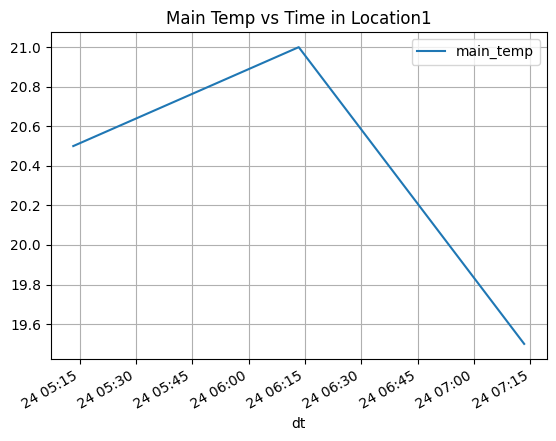

In [4]:
import matplotlib.pyplot as plt

df_etl.plot.line('dt', 'main_temp')
plt.grid()
plt.title(f'Main Temp vs Time in {next(iter(set(df_etl.name)))}')
plt.show()


In [6]:
pip install plotly


   ---------------------------------------- 0.0/17.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/17.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/17.3 MB ? eta -:--:--
    --------------------------------------- 0.3/17.3 MB ? eta -:--:--
   - -------------------------------------- 0.8/17.3 MB 2.4 MB/s eta 0:00:07
   -- ------------------------------------- 1.0/17.3 MB 1.9 MB/s eta 0:00:09
   --- ------------------------------------ 1.6/17.3 MB 2.1 MB/s eta 0:00:08
   ---- ----------------------------------- 2.1/17.3 MB 2.2 MB/s eta 0:00:07
   ------ --------------------------------- 2.9/17.3 MB 2.4 MB/s eta 0:00:07
   --------- ------------------------------ 3.9/17.3 MB 2.8 MB/s eta 0:00:05
   ----------- ---------------------------- 5.0/17.3 MB 3.1 MB/s eta 0:00:05
   ------------- -------------------------- 6.0/17.3 MB 3.3 MB/s eta 0:00:04
   --------------- ------------------------ 6.8/17.3 MB 3.4 MB/s eta 0:00:04
   ------------------ -----

In [1]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip show plotly



Name: plotly
Version: 5.23.0
Summary: An open-source, interactive data visualization library for Python
Home-page: https://plotly.com/python/
Author: Chris P
Author-email: chris@plot.ly
License: MIT
Location: C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages
Requires: packaging, tenacity
Required-by: 


In [3]:
!pip install plotly_express

   ---------------------------------------- 0.0/44.7 MB ? eta -:--:--
   - -------------------------------------- 1.6/44.7 MB 7.6 MB/s eta 0:00:06
   --- ------------------------------------ 3.4/44.7 MB 8.0 MB/s eta 0:00:06
   ---- ----------------------------------- 4.7/44.7 MB 7.9 MB/s eta 0:00:06
   ----- ---------------------------------- 6.0/44.7 MB 7.5 MB/s eta 0:00:06
   ------ --------------------------------- 7.3/44.7 MB 7.2 MB/s eta 0:00:06
   ------- -------------------------------- 8.4/44.7 MB 6.8 MB/s eta 0:00:06
   -------- ------------------------------- 9.4/44.7 MB 6.7 MB/s eta 0:00:06
   --------- ------------------------------ 10.7/44.7 MB 6.5 MB/s eta 0:00:06
   ---------- ----------------------------- 12.1/44.7 MB 6.5 MB/s eta 0:00:06
   ------------ --------------------------- 13.6/44.7 MB 6.5 MB/s eta 0:00:05
   ------------- -------------------------- 14.9/44.7 MB 6.5 MB/s eta 0:00:05
   -------------- ------------------------- 16.0/44.7 MB 6.5 MB/s eta 0:00:05
 

In [2]:
import pandas as pd

df_etl = pd.read_csv('clima-latacunga-hoy.csv')


In [3]:
print(df_etl.columns)



Index(['datetime', 'temperature', 'humidity', 'pressure', 'weather'], dtype='object')


In [18]:
from datetime import datetime
import pandas as pd
import plotly_express as px

# Definir el DataFrame inicial
data = {
    'dt': [1629800000, 1629803600, 1629807200],  # Timestamps de ejemplo
    'main_temp': [20.5, 21.0, 19.5],             # Temperaturas de ejemplo
    'name': ['Location1', 'Location1', 'Location1']  # Nombre del lugar
}
df = pd.DataFrame(data)

# Copiar el DataFrame y realizar las transformaciones
df_etl = df.copy()
df_etl['dt'] = df['dt'].apply(lambda x: datetime.fromtimestamp(x))

# Agregar columna de humedad si es necesario
df_etl['main_humidity'] = [60, 65, 70]  # Valores de ejemplo

# Crear el gráfico
city_name = df_etl['name'].iloc[0]
fig = px.line(df_etl, x='dt', y=['main_temp', 'main_humidity'], title=f"Main Temp & Humidity vs Time in {city_name}")
fig.show()




In [15]:
df_etl = df.copy()
df_etl['dt'] = df['dt'].apply(lambda x: datetime.fromtimestamp(x))



NameError: name 'df' is not defined

In [14]:
import plotly_express as px

# Asegúrate de que la columna 'name' existe
if 'name' in df_etl.columns:
    city_name = df_etl['name'].iloc[0]
    fig = px.line(df_etl, x='dt', y=['main_temp', 'main_humidity'], title=f"Main Temp & Humidity vs Time in {city_name}")
    fig.show()
else:
    print("La columna 'name' no se encuentra en el DataFrame.")


La columna 'name' no se encuentra en el DataFrame.


In [6]:
df_etl.main_temp.hist(bins=20)
plt.title(f'Histogram of Main Temp in {next(iter(set(df_etl.name)))}')
plt.grid()

AttributeError: 'DataFrame' object has no attribute 'main_temp'

In [7]:
fig = px.violin(df_etl, 'main_temp', title=f"Violin Plot Main Temp in {next(iter(set(df_etl.name)))}")
fig.show()

AttributeError: 'DataFrame' object has no attribute 'name'

In [8]:
fig = plt.figure(figsize=(8,6))
plt.plot(df_etl['dt'], df_etl['main_temp'])
plt.grid()
plt.title(f'Main Temp vs Time in {next(iter(set(df_etl.name)))}')
fig.tight_layout()
fname = '/home/leningfe/PythonProjects/QuitoWeather/weather-site/content/images/temperature.pdf'
plt.savefig(fname)

NameError: name 'plt' is not defined

In [9]:
#+begin_src python :results graphics file output :file boxplot.svg
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 5))
tips = sns.load_dataset("tips")
sns.boxplot(x="day", y="tip", data=tips)
#+end_src

ModuleNotFoundError: No module named 'seaborn'